<h2 style = "color:green"><center><i>CLAIMENT DATA-EDA<i></center></h2>
<h3 style = "color:blue"><left><i>EXPLOORATORY DATA ANALYSIS<i></left></h3>

___VENKATESH MUNGI___ venkateshmungi1247@gmail.com

In [1]:
# importing libraries

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
# loading Dataset

clm = pd.read_csv(r"C:\\PYTHON\PANDAS\claimants.csv")
clm.head(4)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037


In [3]:
# Copying the data set
clm_n = clm.copy()
clm_n.head(2)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891


In [4]:
# Getting metadata info()
clm_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


- From the above information it is clear that our data set has only numeric values.

In [5]:
# Getting statistics of the dataset

clm_n.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
# getting the shape of the dataset
clm_n.shape

(1340, 7)

- Our dataset has 1340 rows and 7 columns

In [7]:
# Getting column labels
clm_n.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

In [8]:
# Deleting Unwanted columns i.e "CASENUM"

del clm_n["CASENUM"]

In [9]:
# Finding Missing / null values

clm_n.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
clm_n.isnull().sum().sum()

290

- From the above information it is clear that each column has null values except "ATTORNEY", "LOSS".
- Though "ATTORNEY" has missing values, we need not to touch this column, since it is output.

In [11]:
# To Know the unique value of categorical data of feature "CLMSEX"
clm_n["CLMSEX"].nunique()

2

- The Geography Coumn contains only two categories.

In [12]:
# To Know the categories of feature "Geography"
clm_n[["CLMSEX"]].groupby(["CLMSEX"]).count()

""
CLMSEX
0.0
1.0


##### Filling Null / Missing Values
- Since "CLMSEX", "CLMINSUR", "SEATBELT" belongs to categorical data those has to fill with mode 

In [13]:
clm_n["CLMSEX"].mode()

0    1.0
Name: CLMSEX, dtype: float64

In [14]:
clm_n["CLMINSUR"].mode()

0    1.0
Name: CLMINSUR, dtype: float64

In [15]:
clm_n["SEATBELT"].mode()

0    0.0
Name: SEATBELT, dtype: float64

In [16]:
clm_n["CLMSEX"].fillna(clm_n["CLMSEX"].mode(1), inplace = True)

In [17]:
clm_n["CLMINSUR"].fillna(clm_n["CLMINSUR"].mode(1), inplace = True)

In [18]:
clm_n["SEATBELT"].fillna(clm_n["CLMINSUR"].mode(0), inplace = True)

In [19]:
clm_n

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


- From the above information we have NaN values in "CLMAGE"

In [20]:
# to find the median of feature "CLMAGE"
clm_n["CLMAGE"].median()

30.0

In [21]:
# Replacing NaN values of column "CLMAGE" with median( )
clm_n['CLMAGE'] = clm_n['CLMAGE'].replace(np.nan, 30.0)

In [22]:
clm_n

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,30.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [23]:
# Rechecking for Missing values
clm_n.isnull().sum()

ATTORNEY     0
CLMSEX      12
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
dtype: int64

In [24]:
# Replacing NaN values with appropriate values.
clm_n['CLMSEX'] = clm_n['CLMSEX'].replace(np.nan, 1)

In [25]:
clm_n['CLMINSUR'] = clm_n['CLMINSUR'].replace(np.nan, 1)

In [26]:
clm_n['SEATBELT'] = clm_n['SEATBELT'].replace(np.nan, 0)

In [27]:
clm_n.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

- From the above information  it is clear that we have no null and Nan  Values i our dataset

### Finding outliers

In [28]:
clm_n1 = clm_n.iloc[:, 1:]

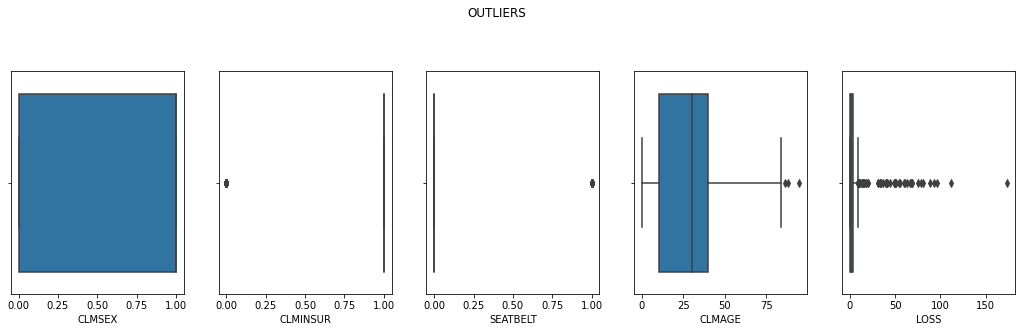

In [29]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,9))
plt.suptitle("OUTLIERS")
plt.subplot(2,5,1)
sns.boxplot(clm_n["CLMSEX"])
plt.subplot(2,5,2)
sns.boxplot(clm_n["CLMINSUR"])
plt.subplot(2,5,3)
sns.boxplot(clm_n["SEATBELT"])
plt.subplot(2,5,4)
sns.boxplot(clm_n["CLMAGE"])
plt.subplot(2,5,5)
sns.boxplot(clm_n["LOSS"])
plt.show()

- From the above visuals it is clear that the features "CLMINSUR", "SEATBELT", "CLMAGE", "LOSS" has Outliers

In [30]:
clm_n["CLMINSUR"].nunique()

2

In [31]:
clm_n["SEATBELT"].nunique()

2

### Checking Distribution Pattern of each column

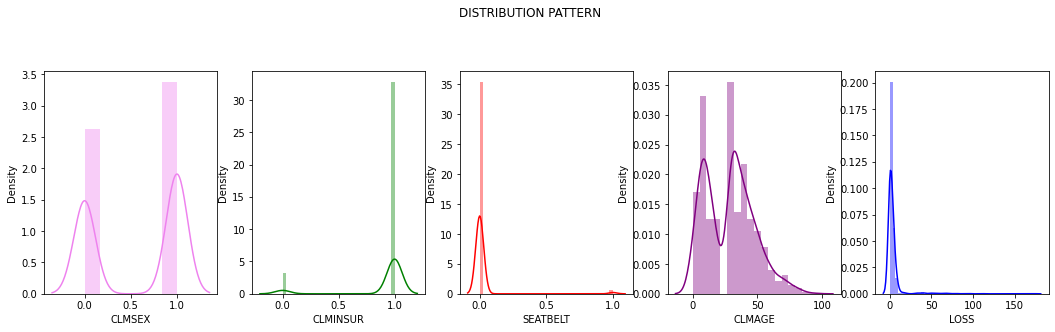

In [32]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,9))
plt.suptitle("DISTRIBUTION PATTERN")
plt.subplot(2,5,1)
sns.distplot(clm_n["CLMSEX"], color = "violet")
plt.subplot(2,5,2)
sns.distplot(clm_n["CLMINSUR"],color = "green")
plt.subplot(2,5,3)
sns.distplot(clm_n["SEATBELT"],color = "red")
plt.subplot(2,5,4)
sns.distplot(clm_n["CLMAGE"],color = "purple")
plt.subplot(2,5,5)
sns.distplot(clm_n["LOSS"],color = "blue")
plt.show()

### Capping Outliers

In [33]:
from feature_engine.outliers import Winsorizer

In [34]:
win = Winsorizer(capping_method = "iqr", tail = 'both', fold = 1.5, variables = ["CLMAGE"])

In [35]:
clm_n["CLMAGE"] = win.fit_transform(clm_n[["CLMAGE"]])

In [36]:
win = Winsorizer(capping_method = "iqr", tail = 'both', fold = 1.5, variables = ["LOSS"])

In [37]:
clm_n["LOSS"] = win.fit_transform(clm_n[["LOSS"]])

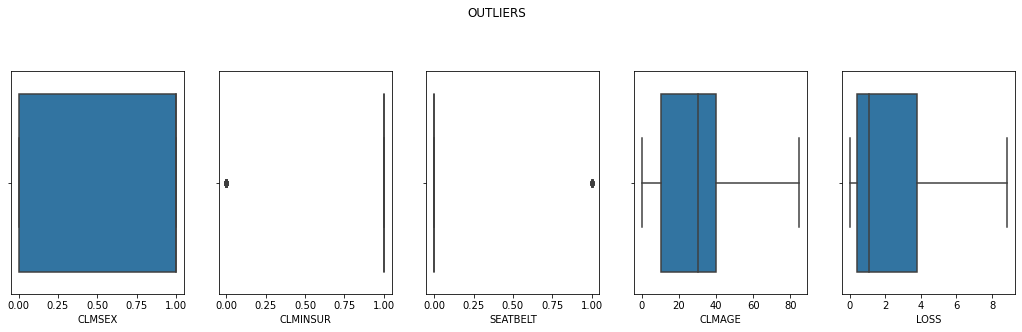

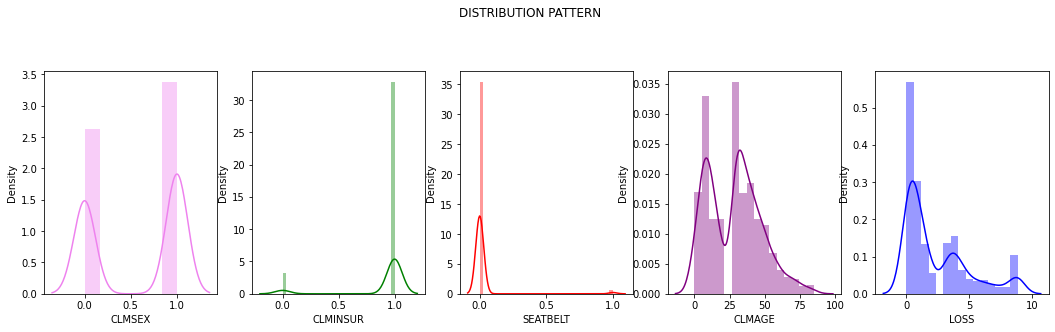

In [38]:
plt.figure(figsize = (18,9))
plt.suptitle("OUTLIERS")
plt.subplot(2,5,1)
sns.boxplot(clm_n["CLMSEX"])
plt.subplot(2,5,2)
sns.boxplot(clm_n["CLMINSUR"])
plt.subplot(2,5,3)
sns.boxplot(clm_n["SEATBELT"])
plt.subplot(2,5,4)
sns.boxplot(clm_n["CLMAGE"])
plt.subplot(2,5,5)
sns.boxplot(clm_n["LOSS"])
plt.figure(figsize = (18,9))
plt.suptitle("DISTRIBUTION PATTERN")
plt.subplot(2,5,1)
sns.distplot(clm_n["CLMSEX"], color = "violet")
plt.subplot(2,5,2)
sns.distplot(clm_n["CLMINSUR"],color = "green")
plt.subplot(2,5,3)
sns.distplot(clm_n["SEATBELT"],color = "red")
plt.subplot(2,5,4)
sns.distplot(clm_n["CLMAGE"],color = "purple")
plt.subplot(2,5,5)
sns.distplot(clm_n["LOSS"],color = "blue")
plt.show()
plt.show()

- From the above visuals it is cleared that Outliers has removed from features "CLMAGE","LOSS"

In [39]:
# Correlation of features with Output variable
corr = clm_n.corr()
corr

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,0.012471,-0.408248
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.022843,-0.014145
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.045679,-0.013623
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.025888,0.059850
CLMAGE,0.012471,-0.022843,0.045679,-0.025888,1.000000,0.121423
LOSS,-0.408248,-0.014145,-0.013623,0.059850,0.121423,1.000000


<AxesSubplot:>

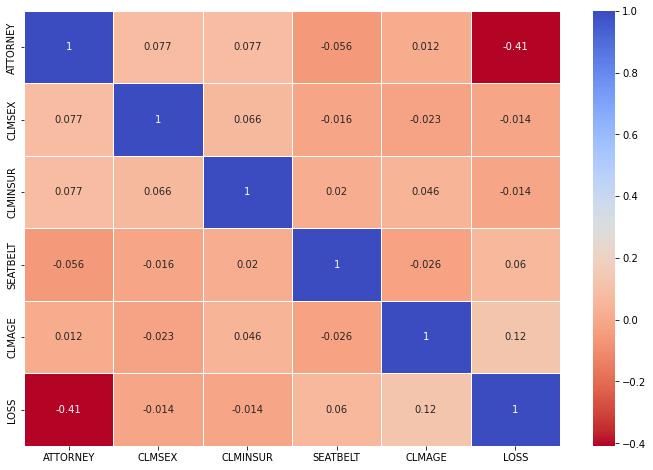

In [40]:
# Graphical Representation of Correlation of features with Output variable
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm_r', annot=True, linewidths= 1.0)

$Positive$ $Correlation$ $Between$

- CLMSEX and ATTORNEY 
- CLMINSUR and ATTORNEY
- CLMAGE and ATTORNEY
- CLMSEX and CLMINSUR
- CLMINSUR and CLMAGE
- CLMINSUR and SEATBELT
- SEATBELT and LOSS
- CLMAGE and LOSS


$Negative$ $Correlation$ $Between$

- SEATBELT and ATTORNEY
- LOSS and ATTORNEY
- CLMSEX and SEATBELT
- CLMSEX and CLMAGE
- CLMSEX and LOSS
- CLMINSUR and LOSS
- SEATBELT ana CLMAGE

### Normlization

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
clm_n["CLMAGE"] = MinMaxScaler().fit_transform(np.array(clm_n["CLMAGE"]).reshape(-1,1))

In [43]:
clm_n.head(3)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,0.588235,8.85375
1,1,1.0,0.0,0.0,0.211765,0.89100
2,1,0.0,1.0,0.0,0.058824,0.33000


### Train_Test_Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
clm_n.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,0.588235,8.85375
1,1,1.0,0.0,0.0,0.211765,0.89100


In [46]:
y = clm_n.iloc[:,0]

In [47]:
x = clm_n.iloc[:,1:]

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, train_size = 0.60)

In [49]:
x_train.head(3)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
523,1.0,1.0,0.0,0.082353,7.707
495,1.0,1.0,0.0,0.352941,0.085
1224,1.0,1.0,0.0,0.388235,0.706


In [50]:
x_test.head(3)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
574,1.0,1.0,0.0,0.576471,6.37100
661,1.0,1.0,0.0,0.482353,8.85375
458,1.0,1.0,0.0,0.352941,8.85375


In [51]:
y_train.count()

804

In [52]:
y_test.count()

536

### CONCLUSION : 

* A correlation coefficient measures the strength of the relationship between two variables.


* A positive correlation indicates two variables that tend to move in the same direction.


* A negative correlation indicates two variables that tend to move in opposite directions.


* A correlation coefficient of -0.8 or lower indicates a strong negative relationship, while a coefficient of -0.3 or lower indicates a very weak one.

***********
There is no limit on exploratory data analysis. Depending on our task or goal, we can approach the data from a different perspective and dig deep to explore.

***********